In [478]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [479]:
WIG20 = ["ACP", "ALE", "CCC", "CDR", "CPS", "DNP", "JSW", "KGH", "KRU", "KTY", "LPP", "MBK", "OPL", "PCO", "PEO", "PGE", "PKN", "PKO", "PZU", "SPL"]

WIG40 = ["11B", "ALR", "APR", "ASB", "ATT", "BDX", "BFT", "BHW", "BMC", "CAR", "CIE", "CMR", "DAT", "DOM", "DVL", "EAT", "ENA", "EUR", "FMF", "GPP",
         "GPW", "HUG", "ING", "KER", "LVC", "LWB", "MAB", "MBR", "MIL", "MRC", "NEU", "PEP", "PKP", "SLV", "STH", "TEN", "TPE", "WPL", "XTB", "ZEP"]

WIG80 = ["1AT", "ABE", "ACG", "ACT", "AGO", "AMB", "AMC", "AML", "APT", "ARH", "ASE", "AST", "ATC", "ATG", "BIO", "BML", "BNP", "BOS", "BOW", "BRS",
         "CAV", "CIG", "CLE", "CLN", "CMP", "COG", "CRJ", "CTX", "DCR", "ECH", "ENT", "ERB", "FRO", "FTE", "GRN", "GTN", "IMC", "INK", "KGN", "LBW",
         "MCI", "MLS", "MOC", "MRB", "NWG", "OND", "OPN", "PBX", "PCF", "PCR", "PEN", "PHN", "PLW", "PXM", "R22", "RBW", "RFK", "RVU", "RWL", "SCP",
         "SEN", "SGN", "SHO", "SKA", "SNK", "SNT", "SNX", "STP", "STX", "TIM", "TOA", "TOR", "UNT", "VGO", "VOT", "VOX", "VRC", "VRG", "WLT", "WWL"]

TICKERS = WIG20 + WIG40 + WIG80

dfs_wig20 = []
dfs_wig40 = []
dfs_wig80 = []

for company in WIG20:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig20.append(ticker.history(period="1y"))

for company in WIG40:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig40.append(ticker.history(period="1y"))

for company in WIG80:
    ticker = yf.Ticker(company + ".WA")
    dfs_wig80.append(ticker.history(period="1y"))

FMF.WA: No data found, symbol may be delisted
BML.WA: No data found, symbol may be delisted


KeyboardInterrupt: 

In [ ]:
dfs = dfs_wig20 + dfs_wig40 + dfs_wig80

In [ ]:
dfs

[                                Open       High        Low      Close  Volume  \
 Date                                                                            
 2022-10-04 00:00:00+02:00  66.795830  68.520833  65.933336  68.233330   63047   
 2022-10-05 00:00:00+02:00  68.281252  68.664587  67.131255  67.754166   40225   
 2022-10-06 00:00:00+02:00  67.802083  68.329170  66.172920  66.843750   68990   
 2022-10-07 00:00:00+02:00  66.699998  66.843749  64.975002  66.029167   57858   
 2022-10-10 00:00:00+02:00  65.550002  65.597915  64.399998  64.783333   41802   
 ...                              ...        ...        ...        ...     ...   
 2023-09-28 00:00:00+02:00  70.949997  71.599998  70.150002  71.050003   55315   
 2023-09-29 00:00:00+02:00  71.800003  72.650002  71.500000  71.699997   86994   
 2023-10-02 00:00:00+02:00  72.000000  72.150002  70.550003  71.349998  159477   
 2023-10-03 00:00:00+02:00  71.500000  72.449997  71.050003  72.050003   61589   
 2023-10-04 00:0

In [ ]:
normal = []

for i in range(len(dfs)):
    df_curr = dfs[i][["Close", "Volume"]]

    mean_close = df_curr["Close"].mean()
    mean_volume = df_curr["Volume"].mean()

    std_close = df_curr["Close"].std()
    std_volume = df_curr["Volume"].std()

    df_curr["Close"] = (df_curr["Close"] - mean_close) / std_close
    df_curr["Volume"] = (df_curr["Volume"] - mean_volume) / std_volume

    normal.append(df_curr.copy())

/tmp/ipykernel_78506/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Close"] = (df_curr["Close"] - mean_close) / std_close
/tmp/ipykernel_78506/1080763992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Volume"] = (df_curr["Volume"] - mean_volume) / std_volume
/tmp/ipykernel_78506/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

/tmp/ipykernel_78506/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Close"] = (df_curr["Close"] - mean_close) / std_close
/tmp/ipykernel_78506/1080763992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr["Volume"] = (df_curr["Volume"] - mean_volume) / std_volume
/tmp/ipykernel_78506/1080763992.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
normal[120]

,Close,Volume
Date,,
2022-10-04 00:00:00+02:00,1.880625,1.737650
2022-10-05 00:00:00+02:00,1.158070,7.154245
2022-10-06 00:00:00+02:00,1.158070,3.148469
2022-10-07 00:00:00+02:00,1.318637,0.408271
2022-10-10 00:00:00+02:00,0.917218,1.136347
...,...,...
2023-09-27 00:00:00+02:00,-1.459182,-0.495198
2023-09-28 00:00:00+02:00,-1.667920,-0.494991
2023-09-29 00:00:00+02:00,-1.459182,-0.111564


In [ ]:
merged = pd.concat(objs=normal, axis=1)
merged = merged.fillna(0)
merged.sort_values(by=['Date'], inplace=True)

print(merged.shape)
print(merged.isna().sum().sum())

(255, 280)
0


In [ ]:
merged

,Close,Volume,Close,Volume,Close,Volume,Close,Volume,Close,Volume,...,Close,Volume,Close,Volume,Close,Volume,Close,Volume,Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-04 00:00:00+02:00,-1.113954,-0.125821,-1.742493,3.007459,-0.555762,0.528824,-1.584175,1.666949,0.679716,0.912301,...,-1.832381,-0.562523,-1.719796,0.125063,-0.963237,-0.550604,-1.613991,-0.530550,-1.109456,-0.689454
2022-10-05 00:00:00+02:00,-1.199741,-0.630695,-1.979202,-0.308551,-0.568867,0.607689,-1.473689,7.246886,0.502461,-0.281214,...,-1.803223,-0.559418,-1.719796,0.987114,-1.224969,-0.502598,-1.632272,-0.712749,-1.035978,-0.665392
2022-10-06 00:00:00+02:00,-1.362738,0.005651,-2.034434,0.985399,-0.697736,0.065000,-1.397655,1.347998,0.012051,0.085424,...,-1.788645,-0.559862,-1.703371,-0.627445,-1.050480,-0.462900,-1.623131,-0.710490,-1.025480,-0.646143
2022-10-07 00:00:00+02:00,-1.508578,-0.240614,-2.146026,0.558495,-0.822236,-0.266977,-1.119656,1.216465,-0.047033,-0.139247,...,-1.642856,-0.508999,-1.703371,-0.663270,-1.050480,-0.509212,-1.641412,-0.749937,-1.035978,-0.631705
2022-10-10 00:00:00+02:00,-1.731626,-0.595809,-2.256490,1.631595,-0.918342,-0.502869,-1.211135,1.054697,-0.100210,-0.156884,...,-1.642856,-0.552321,-1.678734,2.262537,-1.137726,-0.566033,-1.659694,-0.677319,-1.014983,-0.665392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28 00:00:00+02:00,-0.609668,-0.296871,0.506248,1.290751,-0.787289,0.723436,-0.618085,2.387141,-2.900857,1.661570,...,1.316272,-0.230585,0.844790,0.516043,0.699722,0.378128,0.364111,-0.408224,2.003833,0.359651
2023-09-29 00:00:00+02:00,-0.493296,0.403940,0.591914,0.246933,-0.564499,-0.504377,-0.528289,0.391343,-2.720646,1.426478,...,1.528484,-0.341478,0.912796,-0.571812,0.977414,-0.387200,0.517103,-0.553270,2.003833,-0.679830
2023-10-02 00:00:00+02:00,-0.555958,2.007428,0.696743,-0.305559,-0.913974,0.097357,-0.791691,-0.132789,-2.977668,0.286252,...,1.013111,0.503079,0.929798,0.013625,0.977414,-0.172783,0.421483,-0.748737,2.003833,-0.121590


In [ ]:
arrs = []

for row in merged.iterrows():
    arrs.append(row[1:])

dataset = np.squeeze(np.stack(tuple(arrs)))

dataset.shape

(255, 280)

In [ ]:
import torch.optim as optim

layer = nn.TransformerEncoderLayer(d_model=280, nhead=4)
model = nn.TransformerEncoder(layer, num_layers=2)

optimizer = optim.AdamW(model.parameters())
loss_function = nn.MSELoss()

In [ ]:
class Iter:
    def __init__(self, dataset):
        self.data = dataset
        self.idx = 0

    def inc(self):
        self.idx += 1

        return self.idx

    def __next__(self):
        idx = self.inc()

        if idx >= self.data.shape[0]:
            raise StopIteration
        else:
            return self.data[idx - 1], self.data[idx]

    def __iter__(self):
        return self

In [ ]:
train, test = np.array_split(dataset, 2)

print(train.shape, test.shape)

(128, 280) (127, 280)


In [ ]:
test_loss_before = []

iter_test = Iter(test)
test_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_test:
    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    test_seq = torch.cat((test_seq, inp), dim=0)

    y_hat = model(test_seq).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])

    test_loss_before.append(loss.item())

print("Test loss: ", sum(test_loss_before) / len(test_loss_before))

Test loss:  1.8103163029466356


In [ ]:
train_loss = []

iter_train = Iter(train)
train_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_train:
    optimizer.zero_grad()

    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    train_seq = torch.cat((train_seq, inp), dim=0)

    y_hat = model(train_seq).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())


print("Train loss: ", sum(train_loss) / len(train_loss))

Train loss:  0.26720165631433174


In [ ]:
test_loss_before = []

iter_test = Iter(test)
test_seq = torch.zeros(280).unsqueeze(0)

for x, y in iter_test:
    inp = torch.tensor(x, dtype=torch.float).unsqueeze(0)
    test_seq = torch.cat((test_seq, inp), dim=0)

    y_hat = model(test_seq).squeeze().to(torch.float32)
    y = torch.tensor(y).to(torch.float32)

    pred = y_hat[0]
    loss = loss_function(pred[::2], y[::2])
    test_loss_before.append(loss.item())

print("Test loss: ", sum(test_loss_before) / len(test_loss_before))

Test loss:  1.5615161233951176


In [565]:
simulated_seq = torch.rand(280).softmax(dim=0).unsqueeze(0)

fake_data = []
for i in range(0, 50):
    fake_y = model(simulated_seq)
    pred = fake_y[0].unsqueeze(0)

    simulated_seq = torch.cat((simulated_seq, pred), dim=0)

    fake_data.append(pred.detach().numpy().squeeze()[::2])

In [566]:
price_action = np.stack(fake_data).T

#Normalisation step
price_action_norm = price_action - np.expand_dims(np.average(price_action, axis=1), axis=0).T

price_action.shape


(140, 50)

In [567]:
prices = np.cumsum(price_action, axis=1)
prices_norm = np.cumsum(price_action_norm, axis=1)

prices.shape

(140, 50)

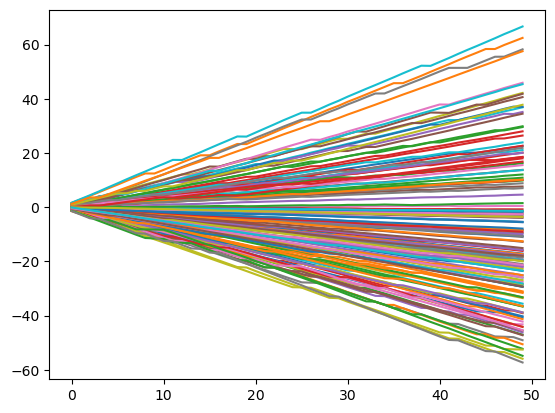

In [568]:
import matplotlib.pyplot as plt

plt.plot(prices.T)

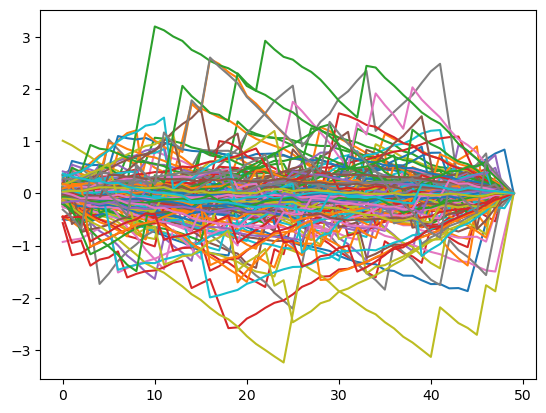

In [569]:
plt.plot(prices_norm.T)

In [570]:
dataset.T[::2].shape

(140, 255)

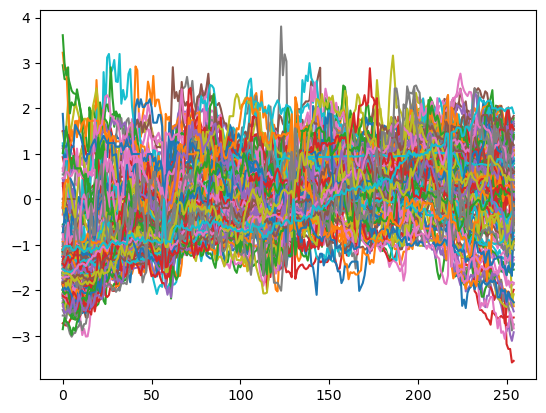

In [571]:
plt.plot(dataset.T[::2].T)